In [1]:
 import numpy as np

np.random.beta(5, 5, size=3)

array([0.41416449, 0.37409427, 0.53809066])

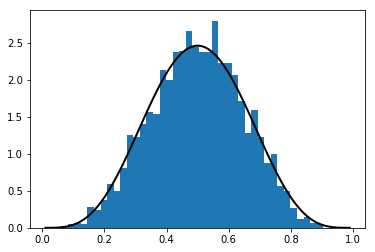

In [3]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [4]:
q.cdf(0.4)      # Cumulative distribution function
q.pdf(0.4)      # Density function
q.ppf(0.8)      # Quantile (inverse cdf) function
q.mean()

0.5

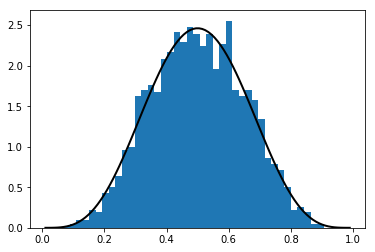

In [5]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()

In [6]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.9894520083127014, 0.004283410269614124)

In [7]:
from scipy.optimize import bisect

f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
bisect(f, 0, 1)

from scipy.optimize import newton

newton(f, 0.2)   # Start the search at initial condition x = 0.2

newton(f, 0.7)   # Start the search at x = 0.7 instead

0.7001700000000282

In [8]:
%timeit bisect(f, 0, 1)

152 µs ± 3.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit newton(f, 0.2)
#On the other hand, using IPython’s timeit magic, we see that newton can be much faster

35.4 µs ± 6.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
from scipy.optimize import *
brentq(f, 0, 1)
%timeit brentq(f, 0, 1)
#In scipy.optimize, the function brentq is such a hybrid method, and a good default

30.5 µs ± 5.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**2, 10.0)  # 10.0 is an initial guess

array(1.)

In [13]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

0.0

In [14]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

In [15]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b
    if upper - lower < tol:
        return 0.5 * (upper + lower)
    else:
        middle = 0.5 * (upper + lower)
        print('Current mid point = {}'.format(middle))
        if f(middle) > 0:   # Implies root is between lower and middle
            bisect(f, lower, middle)
        else:               # Implies root is between middle and upper
            bisect(f, middle, upper)

In [16]:
import numpy as np
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1

bisect(f, 0, 1)

Current mid point = 0.5
Current mid point = 0.25
Current mid point = 0.375
Current mid point = 0.4375
Current mid point = 0.40625
Current mid point = 0.421875
Current mid point = 0.4140625
Current mid point = 0.41015625
Current mid point = 0.408203125
Current mid point = 0.4091796875
Current mid point = 0.40869140625
Current mid point = 0.408447265625
Current mid point = 0.4083251953125
Current mid point = 0.40826416015625


In [18]:
from bs4 import BeautifulSoup as BS
BS?

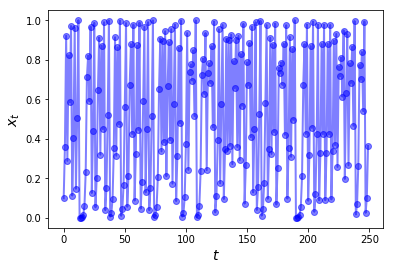

In [21]:
class Chaos:
    """
    Models the dynamical system with :math:`x_{t+1} = r x_t (1 - x_t)`
    """
    def __init__(self, x0, r):
        """
        Initialize with state x0 and parameter r 
        """
        self.x, self.r = x0, r
        
    def update(self):
        "Apply the map to update state."
        self.x =  self.r * self.x *(1 - self.x)
        
    def generate_sequence(self, n):
        "Generate and return a sequence of length n."
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path
    import matplotlib.pyplot as plt

ch = Chaos(0.1, 4.0) 
ts_length = 250

fig,ax = plt.subplots()#fig是底层
ax.set_xlabel(r'$t$', fontsize=14)
ax.set_ylabel(r'$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label=r'$x_t$')
plt.show()

In [22]:
a=[1,2,3]